### CRDM questplus

Looking at the ADO portion done with questplus

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import os,sys

In [47]:
#  'crdm_mean_alpha',
#  'crdm_mean_beta',
#  'crdm_mean_gamma',
#  'crdm_sd_alpha',
#  'crdm_sd_beta',
#  'crdm_sd_gamma',
#  'crdm_lott_reward',
#  'crdm_lott_prob',
#  'crdm_ambig_level',

def plot_param_estim(utility_dir,idx,fn,df):
    def add_sd(df,xcol,ycol,ysd):
        upper_bound = df[ycol] + df[ysd]
        lower_bound = df[ycol] - df[ysd]
        plt.fill_between(df[xcol],lower_bound,upper_bound,alpha=0.2)

    subj = os.path.basename(fn).replace('_qp_crdm.csv','')
    plt.figure(idx)
    xcol = 'trial_nb'
    df[xcol] = [i for i in range(df.shape[0])]

    plt.subplot(311)
    ycol = 'crdm_mean_alpha'
    ysd = 'crdm_sd_alpha'
    ax = sns.lineplot(data=df,x=xcol,y=ycol)
    add_sd(df,xcol,ycol,ysd)
    ax.set(xlabel=None,ylabel='alpha')
    ax.set(xticklabels=[])
    plt.title(subj)

    plt.subplot(312)
    ycol = 'crdm_mean_beta'
    ysd = 'crdm_sd_beta'
    ax = sns.lineplot(data=df,x=xcol,y=ycol)
    ax.set(xlabel=None,ylabel='beta')
    ax.set(xticklabels=[])
    add_sd(df,xcol,ycol,ysd)

    plt.subplot(313)
    ycol = 'crdm_mean_gamma'
    ysd = 'crdm_sd_gamma'
    ax = sns.lineplot(data=df,x=xcol,y=ycol)
    ax.set(xlabel='trial #',ylabel='gamma')
    add_sd(df,xcol,ycol,ysd)
    plt.tight_layout()

    fig_fn = os.path.join(utility_dir,subj,'crdm/{}_crdm_qp_param_estimates.png'.format(subj))
    if not os.path.exists(os.path.dirname(fig_fn)):
        os.makedirs(os.path.dirname(fig_fn))
    print("Saving to: {}".format(fig_fn))
    plt.savefig(fig_fn)
    plt.show()



Saving to: /Volumes/UCDN/datasets/IDM_ado/utility_qp/23_IDM_ado_0150/crdm/23_IDM_ado_0150_crdm_qp_param_estimates.png


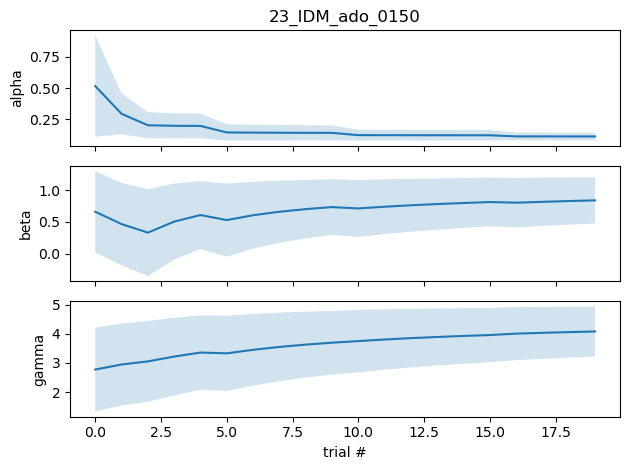

Saving to: /Volumes/UCDN/datasets/IDM_ado/utility_qp/23_IDM_ado_0151/crdm/23_IDM_ado_0151_crdm_qp_param_estimates.png


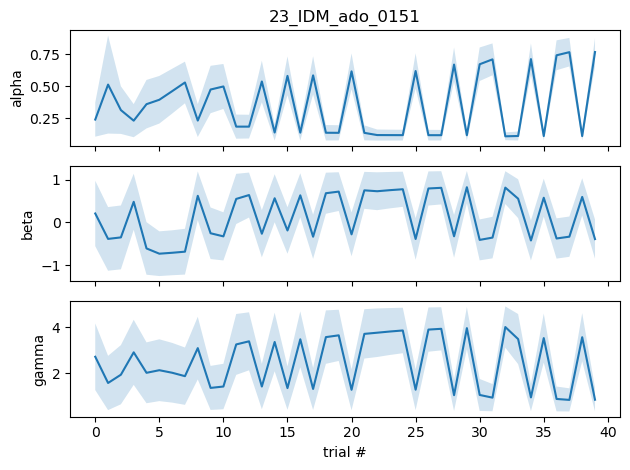

Saving to: /Volumes/UCDN/datasets/IDM_ado/utility_qp/23_IDM_ado_0152/crdm/23_IDM_ado_0152_crdm_qp_param_estimates.png


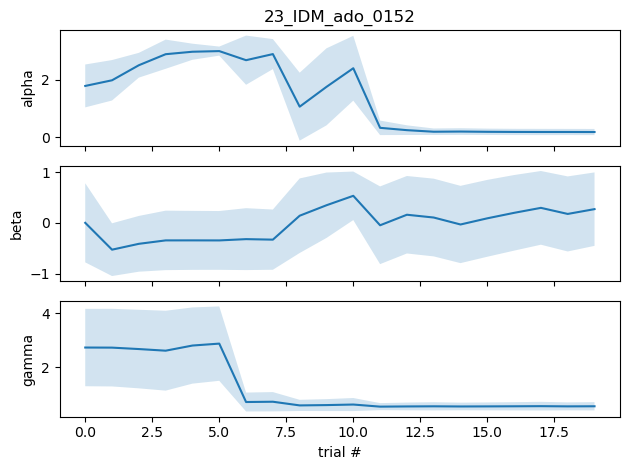

Saving to: /Volumes/UCDN/datasets/IDM_ado/utility_qp/23_IDM_ado_0153/crdm/23_IDM_ado_0153_crdm_qp_param_estimates.png


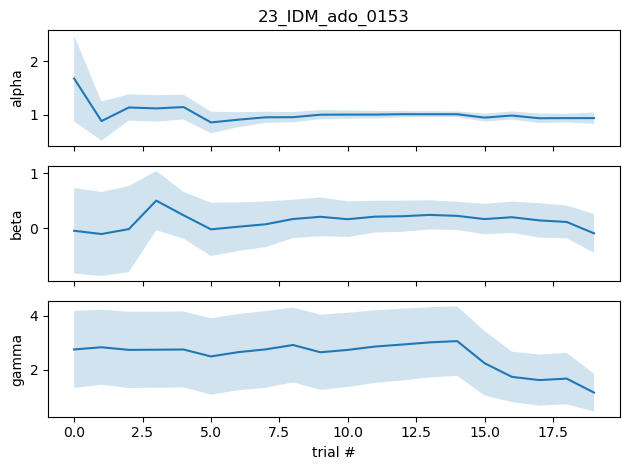

Saving to: /Volumes/UCDN/datasets/IDM_ado/utility_qp/23_IDM_ado_0154/crdm/23_IDM_ado_0154_crdm_qp_param_estimates.png


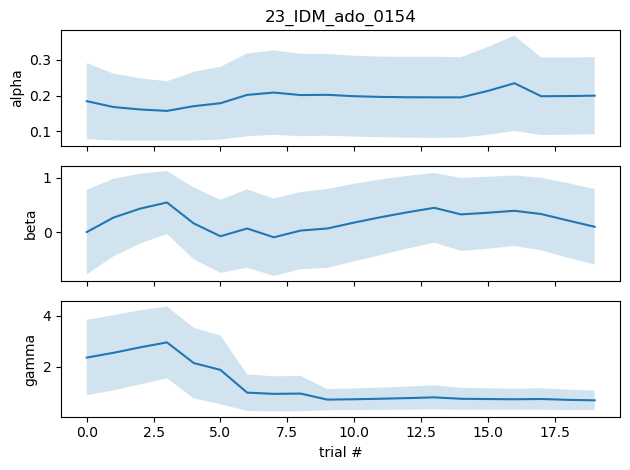

Saving to: /Volumes/UCDN/datasets/IDM_ado/utility_qp/23_IDM_ado_0155/crdm/23_IDM_ado_0155_crdm_qp_param_estimates.png


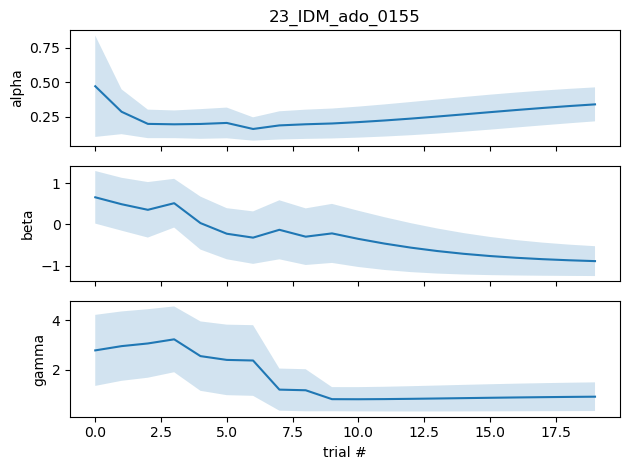

Saving to: /Volumes/UCDN/datasets/IDM_ado/utility_qp/23_IDM_ado_0156/crdm/23_IDM_ado_0156_crdm_qp_param_estimates.png


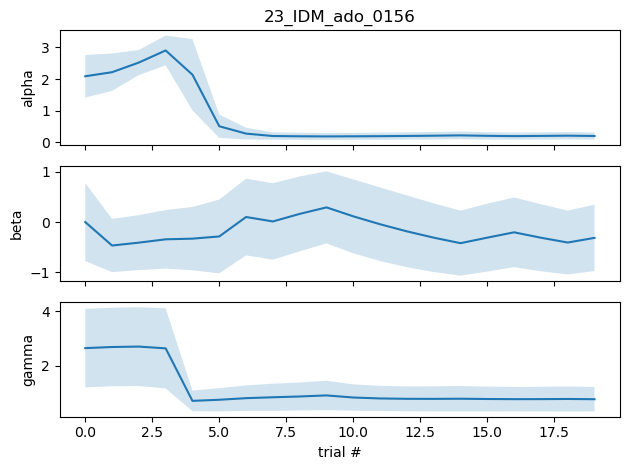

Saving to: /Volumes/UCDN/datasets/IDM_ado/utility_qp/23_IDM_ado_0157/crdm/23_IDM_ado_0157_crdm_qp_param_estimates.png


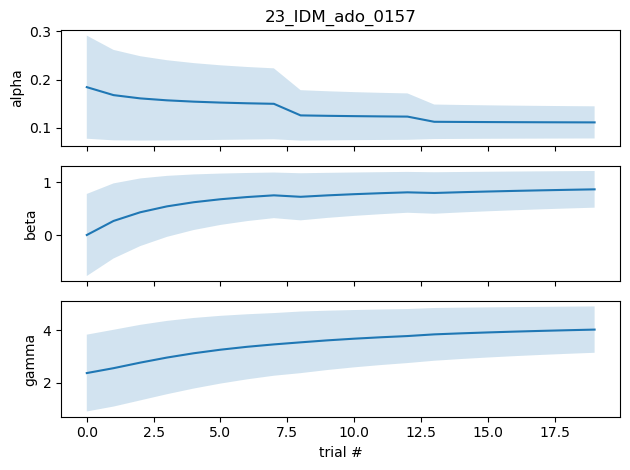

In [48]:
split_dir = '/Volumes/UCDN/datasets/IDM_ado/split_qp/'
utility_dir = '/Volumes/UCDN/datasets/IDM_ado/utility_qp/'

#get set of all good data files for analysis
good_files = sorted(glob(os.path.join(split_dir, '*/crdm/*.csv')))
if (not good_files):
    print("No good files available. Check file path.")
    sys.exit()
some_sub = [1,10,30,50,80,100,140]
for idx, subj_fn in enumerate(good_files):
    df = pd.read_csv(subj_fn)
    plot_param_estim(utility_dir,idx,subj_fn,df)
